<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [43]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [44]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [ ]:
равномерное распределение

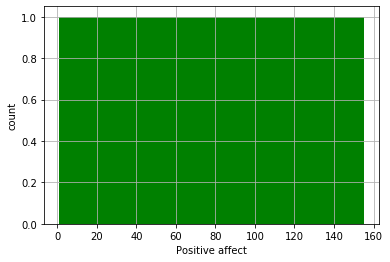

In [40]:
n, bins, patches = plt.hist(df['Positive affect'], 155, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('count')
plt.grid(True)
plt.show()

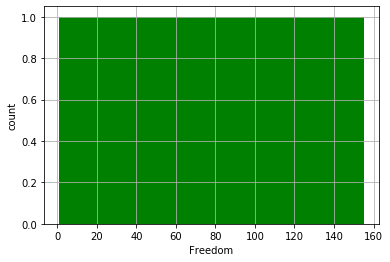

In [39]:
n, bins, patches = plt.hist(df['Freedom'], 155, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('count')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [46]:
df=df.dropna(subset=['Freedom']) #удалил NaN что бы не мешалось

In [147]:
 
print('Размах: ',max(df['Freedom']) - min(df['Freedom']))

Размах:  154.0


In [131]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  78.0


In [132]:
print('Ст.откл: ',statistics.pstdev(df['Freedom']))
print('Дисперсия: ',statistics.pstdev(df['Freedom'])**2)

Ст.откл:  44.74371464239419
Дисперсия:  2002.0


In [133]:
print('Максимум: ', max(df['Freedom']))
print('Минимум: ', min(df['Freedom']))

Максимум:  155.0
Минимум:  1.0


In [134]:
print('Средняя: ', statistics.mean(df['Freedom']))

Средняя:  78.0


In [135]:
print('Значение моды: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 155 equally common values

Почему нельзя найти моду?

In [0]:
не знает какое выбрать все знрачения уникальны

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

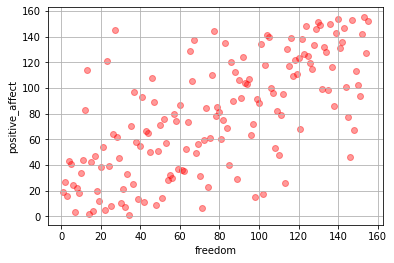

корелляция = 0.6817698430601656


In [47]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='red', alpha=0.4)

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.show()

from scipy.stats import pearsonr
corr, p_value=pearsonr(freedom, positive_affect)
print('корелляция =', corr)


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [163]:
freedom_1 = freedom - statistics.mean(freedom)

0.0


In [166]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

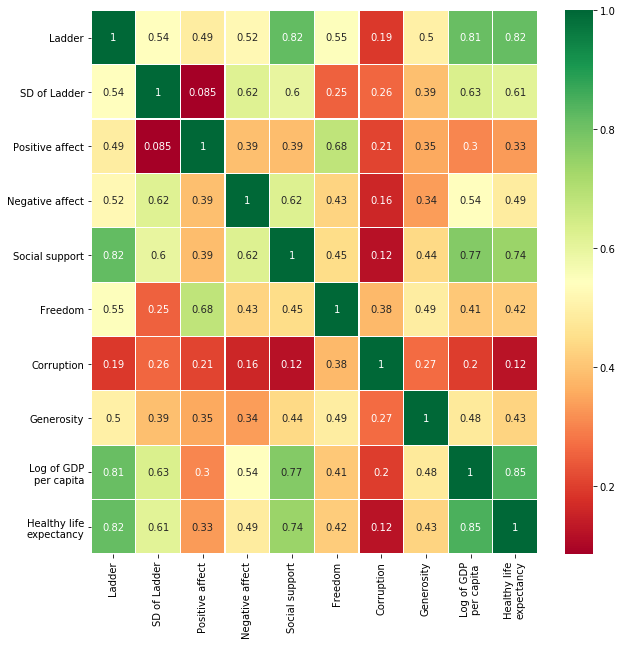

In [161]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [0]:
те что ближе к зеленому цвету значительно коррелируют

Загрузить таблицу цен на авокадо: 

In [4]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

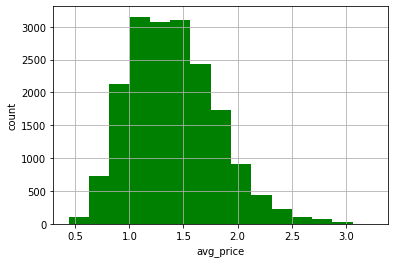

In [30]:
n, bins, patches = plt.hist(df['AveragePrice'],15 , facecolor='g')

plt.xlabel('avg_price')
plt.ylabel('count')
plt.grid(True)
plt.show()
# это нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

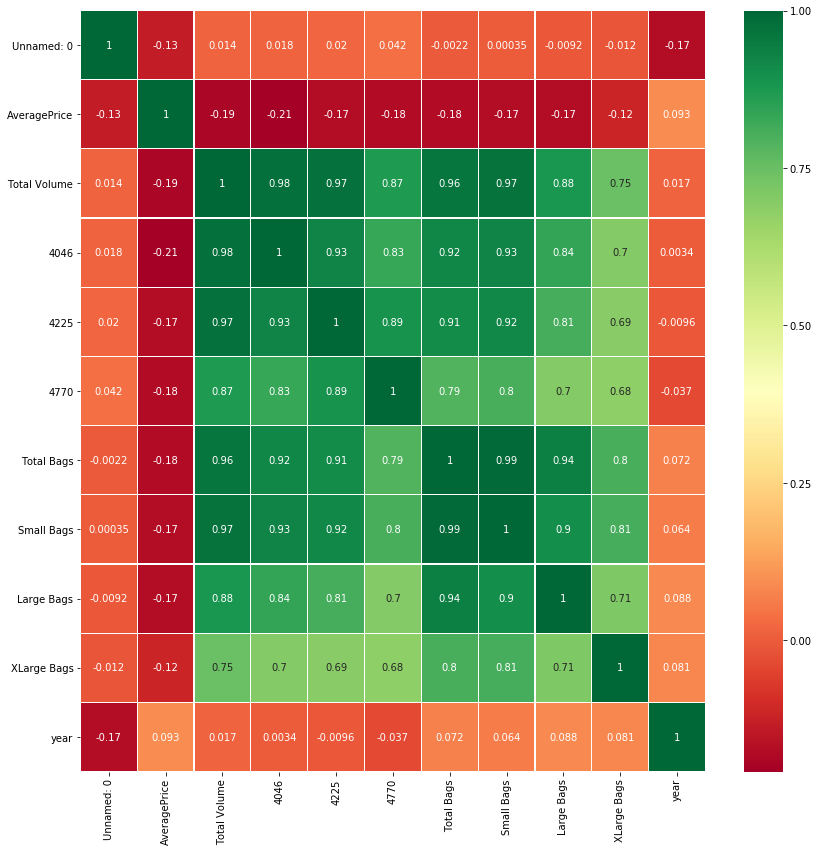

In [7]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.show()

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [8]:
PREDICTION_TYPE = 'organic'
df_conv = df[df.type == PREDICTION_TYPE]
regions = df_conv.groupby(df_conv.region)
PREDICTING_FOR = "LasVegas"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)



date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [9]:
date_price = date_price.sort_values(by='ds')

In [20]:
train_price = date_price[(date_price['ds'] < '2017-08-01')]
test_price = date_price[(date_price['ds'] >= '2017-08-01')&(date_price['ds'] < '2018-04-01')]


In [21]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [23]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784347,1.211937,1.772383,1.784347,1.784347,-0.279665,-0.279665,-0.279665,-0.279665,-0.279665,-0.279665,0.0,0.0,0.0,1.504682
1,2015-01-11,1.783780,1.224180,1.795745,1.783780,1.783780,-0.285278,-0.285278,-0.285278,-0.285278,-0.285278,-0.285278,0.0,0.0,0.0,1.498502
2,2015-01-18,1.783212,1.236905,1.792413,1.783212,1.783212,-0.278068,-0.278068,-0.278068,-0.278068,-0.278068,-0.278068,0.0,0.0,0.0,1.505144
3,2015-01-25,1.782644,1.193317,1.787002,1.782644,1.782644,-0.275841,-0.275841,-0.275841,-0.275841,-0.275841,-0.275841,0.0,0.0,0.0,1.506804
4,2015-02-01,1.782077,1.225889,1.810238,1.782077,1.782077,-0.276099,-0.276099,-0.276099,-0.276099,-0.276099,-0.276099,0.0,0.0,0.0,1.505978


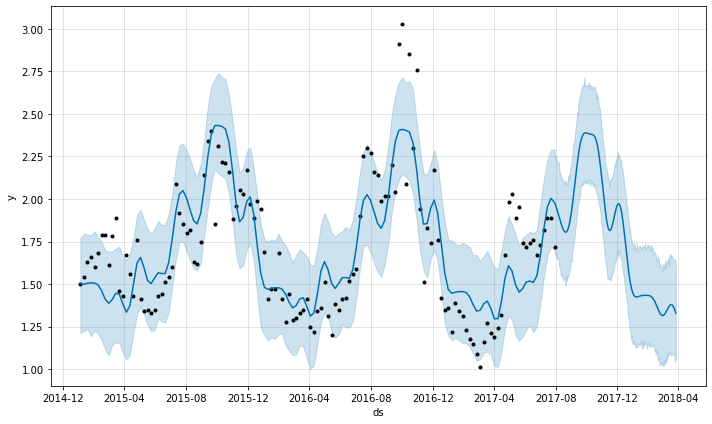

In [24]:
fig1 = m.plot(forecast)

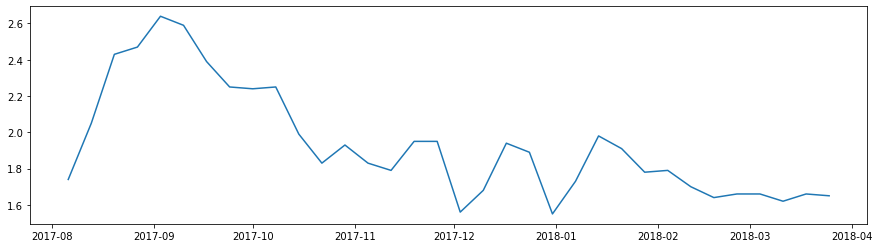

In [25]:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.show()

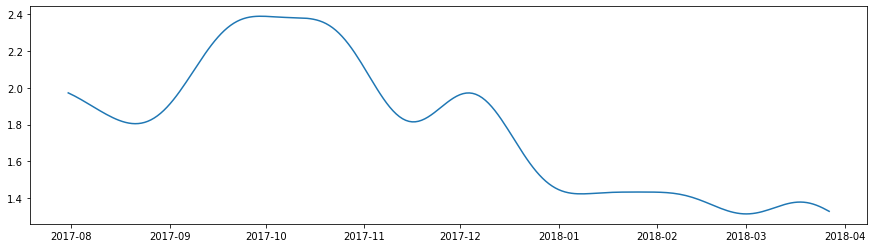

In [26]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

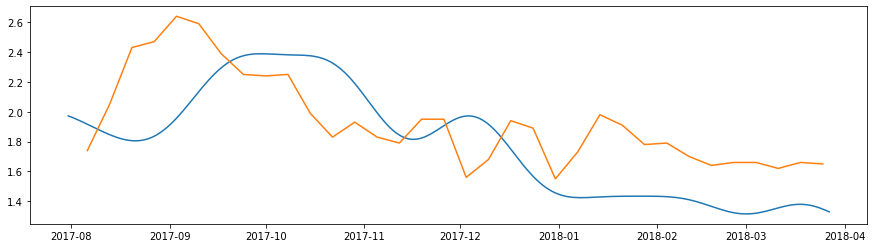

In [27]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.show()